In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
(ds_train, ds_test), ds_info =tfds.load('mnist', split=['train', 'test'], shuffle_files=False,as_supervised=True,with_info=True,)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) /255., label
ds_train = ds_train.map(normalize_img)
ds_train = ds_train.batch(128)
ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(64,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)

In [ ]:
history = model.fit(ds_train,epochs=20,batch_size=128,validation_data=ds_test,)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.2578 - sparse_categorical_accuracy: 0.6938 - val_loss: 0.6786 - val_sparse_categorical_accuracy: 0.8495
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5734 - sparse_categorical_accuracy: 0.8604 - val_loss: 0.4664 - val_sparse_categorical_accuracy: 0.8841
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4483 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.3940 - val_sparse_categorical_accuracy: 0.8988
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3948 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.3565 - val_sparse_categorical_accuracy: 0.9059
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3634 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.3325 - val_sparse_categorical_accuracy: 0.9104
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3417 - sparse_categoric

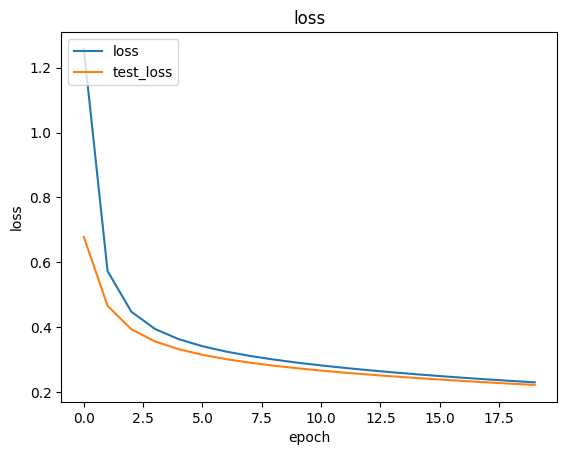

79/79 [==============================] - 1s 9ms/step - loss: 0.2225 - sparse_categorical_accuracy: 0.9363
Test accuracy: 0.9362999796867371


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','test_loss'], loc='upper left')
plt.show()
# Evaluate the model
scores = model.evaluate(ds_test)
print("Test accuracy:",scores[1])

Pratical Questions:

    1. Consider the train and validation loss: How does it change if you vary the number of epochs? The learning rate?

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(64,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
history = model.fit(ds_train,epochs=10,batch_size=128,validation_data=ds_test,)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 1.1921 - sparse_categorical_accuracy: 0.7086 - val_loss: 0.6626 - val_sparse_categorical_accuracy: 0.8479
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5668 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4652 - val_sparse_categorical_accuracy: 0.8814
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4481 - sparse_categorical_accuracy: 0.8807 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.8962
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3957 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3585 - val_sparse_categorical_accuracy: 0.9030
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3648 - sparse_categorical_accuracy: 0.8997 - val_loss: 0.3349 - val_sparse_categorical_accuracy: 0.9088
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3433 - sparse_catego

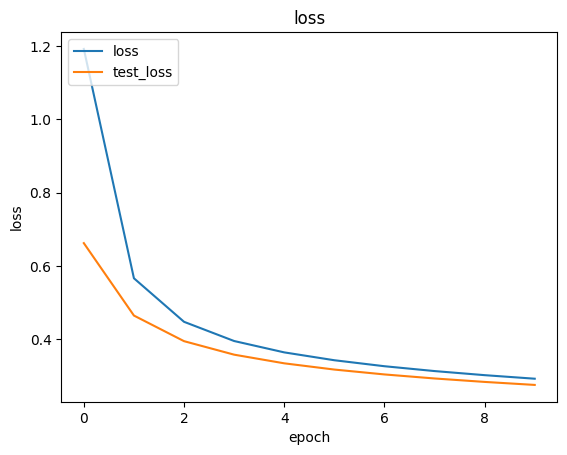

79/79 [==============================] - 0s 5ms/step - loss: 0.2760 - sparse_categorical_accuracy: 0.9226
Test accuracy: 0.9225999712944031


In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','test_loss'], loc='upper left')
plt.show()
# Evaluate the model
scores = model.evaluate(ds_test)
print("Test accuracy:",scores[1])

Com a diminuição do numero de epochs para metade, a accuracy diminuiu mas as perdas foram as mesmas. Estas camadas são as mesmas 10 que foram executadas no classificador anterior. Por isso o gráfico tem o mesmo formato

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(64,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
history = model.fit(ds_train,epochs=30,batch_size=128,validation_data=ds_test)

Epoch 1/30
469/469 [==============================] - 5s 10ms/step - loss: 1.3430 - sparse_categorical_accuracy: 0.6470 - val_loss: 0.7275 - val_sparse_categorical_accuracy: 0.8402
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.6035 - sparse_categorical_accuracy: 0.8546 - val_loss: 0.4839 - val_sparse_categorical_accuracy: 0.8839
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.4619 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.4051 - val_sparse_categorical_accuracy: 0.8948
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.4037 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.3654 - val_sparse_categorical_accuracy: 0.9024
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3707 - sparse_categorical_accuracy: 0.8979 - val_loss: 0.3408 - val_sparse_categorical_accuracy: 0.9073
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.3484 - sparse_categor

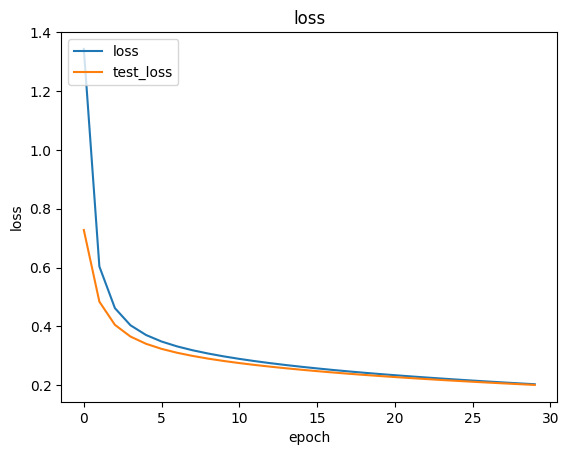

79/79 [==============================] - 1s 6ms/step - loss: 0.2009 - sparse_categorical_accuracy: 0.9417
Test accuracy: 0.9416999816894531


In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','test_loss'], loc='upper left')
plt.show()
# Evaluate the model
scores = model.evaluate(ds_test)
print("Test accuracy:",scores[1])

A accuracy aumentou, devido ao maior numero de camadas, o inicio do grafico das perdas é semelhante visto que as primeiras 20 camadas foram iguais.

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(64,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.SGD(0.02),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
history = model.fit(ds_train,epochs=10,batch_size=128,validation_data=ds_test,)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.8902 - sparse_categorical_accuracy: 0.7848 - val_loss: 0.4608 - val_sparse_categorical_accuracy: 0.8832
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4191 - sparse_categorical_accuracy: 0.8885 - val_loss: 0.3563 - val_sparse_categorical_accuracy: 0.9038
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3526 - sparse_categorical_accuracy: 0.9023 - val_loss: 0.3166 - val_sparse_categorical_accuracy: 0.9147
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.3198 - sparse_categorical_accuracy: 0.9104 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9194
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2979 - sparse_categorical_accuracy: 0.9161 - val_loss: 0.2764 - val_sparse_categorical_accuracy: 0.9227
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2811 - sparse_categor

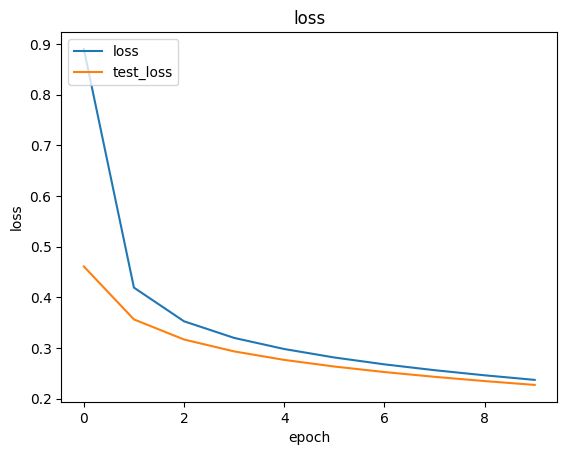

79/79 [==============================] - 1s 9ms/step - loss: 0.2270 - sparse_categorical_accuracy: 0.9362
Test accuracy: 0.9362000226974487


In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','test_loss'], loc='upper left')
plt.show()
# Evaluate the model
scores = model.evaluate(ds_test)
print("Test accuracy:",scores[1])

In [29]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(64,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.SGD(0.005),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
history = model.fit(ds_train,epochs=10,batch_size=128,validation_data=ds_test,)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 1.5643 - sparse_categorical_accuracy: 0.6106 - val_loss: 1.0028 - val_sparse_categorical_accuracy: 0.7974
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.8152 - sparse_categorical_accuracy: 0.8210 - val_loss: 0.6502 - val_sparse_categorical_accuracy: 0.8534
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.6013 - sparse_categorical_accuracy: 0.8578 - val_loss: 0.5227 - val_sparse_categorical_accuracy: 0.8745
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5090 - sparse_categorical_accuracy: 0.8734 - val_loss: 0.4579 - val_sparse_categorical_accuracy: 0.8866
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4572 - sparse_categorical_accuracy: 0.8825 - val_loss: 0.4186 - val_sparse_categorical_accuracy: 0.8929
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.4236 - sparse_categori

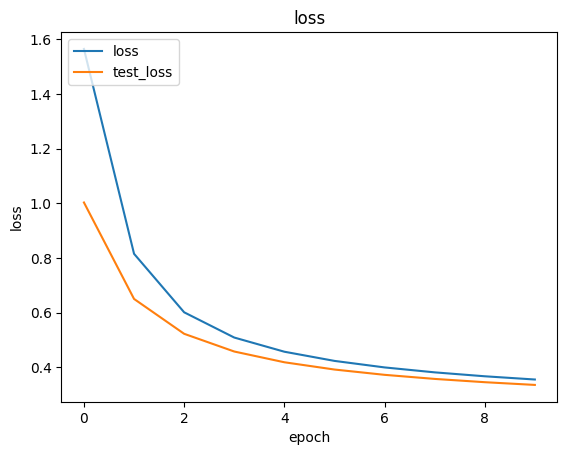

79/79 [==============================] - 0s 6ms/step - loss: 0.3358 - sparse_categorical_accuracy: 0.9064
Test accuracy: 0.9064000248908997


In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','test_loss'], loc='upper left')
plt.show()
# Evaluate the model
scores = model.evaluate(ds_test)
print("Test accuracy:",scores[1])